In [1]:
# Import neccessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.feature_selection import chi2
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Dataset
dataset = pd.read_csv('Pergency Ladies Diabetes Prediction.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
input = dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

output = dataset[['Outcome']]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(input,output,test_size=0.3,random_state=0)

In [9]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# SVMC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
#Param_grid = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'gamma':['scale', 'auto'],'C':[10,100,1000,2000,300]}
Param_grid = {'kernel':['linear','rbf', 'sigmoid'], 'gamma':['scale', 'auto'],'C':[10,100,1000,2000,300]}
grid=GridSearchCV(SVC(probability=True),Param_grid,refit=True,verbose=3,n_jobs=-1,scoring='f1_weighted')
grid.fit(X_train,y_train)


prnt = grid.cv_results_
SVM_grid_prediction = grid.predict(X_test)
from sklearn.metrics import confusion_matrix
SVM_class = confusion_matrix(y_test,SVM_grid_prediction)
from sklearn.metrics import classification_report
SVM_class_report = classification_report (y_test,SVM_grid_prediction)
print(SVM_class,SVM_class_report)

from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,grid.predict_proba(X_test)[:,1])
print('roc_auc_score: ',roc_auc_score)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[[141  16]
 [ 34  40]]               precision    recall  f1-score   support

           0       0.81      0.90      0.85       157
           1       0.71      0.54      0.62        74

    accuracy                           0.78       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.78      0.78      0.77       231

roc_auc_score:  0.8330177311069031


In [11]:
# Decission Tree

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
Param_grid = {'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_features':['sqrt','log2']}
DT_grid=GridSearchCV(DecisionTreeClassifier(),Param_grid,refit=True,verbose=3,n_jobs=-1,scoring='f1_weighted')
DT_grid.fit(X_train,y_train)

prnt = DT_grid.cv_results_

DT_grid_prediction = DT_grid.predict(X_test)
from sklearn.metrics import confusion_matrix
DT_class = confusion_matrix(y_test,DT_grid_prediction)
from sklearn.metrics import classification_report
DT_class_report = classification_report (y_test,DT_grid_prediction)
print(DT_class,DT_class_report)

from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,DT_grid.predict_proba(X_test)[:,1])
print('roc_auc_score: ', roc_auc_score)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[[125  32]
 [ 25  49]]               precision    recall  f1-score   support

           0       0.83      0.80      0.81       157
           1       0.60      0.66      0.63        74

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.76      0.75      0.76       231

roc_auc_score:  0.7291702530556035


In [12]:
# Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {'criterion':['gini','entropy','log_loss'],'max_features':['sqrt','log2']}
RF_grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=3,n_jobs=-3,scoring='f1_weighted')
RF_grid.fit(X_train,y_train)

#print(RF_grid.cv_results_)

RF_grid_prediction = RF_grid.predict(X_test)
from sklearn.metrics import confusion_matrix
RF_class = confusion_matrix(y_test,RF_grid_prediction)
from sklearn.metrics import classification_report
RF_class_report = classification_report (y_test,RF_grid_prediction)
print(RF_class,RF_class_report)

from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,RF_grid_prediction)
print('roc_auc_score: ',roc_auc_score)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[[139  18]
 [ 35  39]]               precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.68      0.53      0.60        74

    accuracy                           0.77       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.76      0.77      0.76       231

roc_auc_score:  0.7061886727491823


In [13]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid  = {'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky','sag','saga'], 'penalty':['l1', 'l2', 'elasticnet'] }
LR_grid = GridSearchCV(LogisticRegression(),param_grid,refit=True,verbose=3,n_jobs=-1,scoring='f1_weighted')
LR_grid.fit(X_train,y_train)

#print = LR_grid.cv_results_

LR_grid_prediction = LR_grid.predict(X_test)
from sklearn.metrics import confusion_matrix
LR_class = confusion_matrix(y_test,LR_grid_prediction)
from sklearn.metrics import classification_report
LR_class_report = classification_report(y_test,LR_grid_prediction)
print(LR_class,LR_class_report)

from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,LR_grid_prediction)
print('roc_auc_score: ',roc_auc_score)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[[142  15]
 [ 35  39]]               precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.72      0.53      0.61        74

    accuracy                           0.78       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.78      0.78      0.77       231

roc_auc_score:  0.7157428128765708


In [14]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':[5], 'weights':['uniform','distance'], 'algorithm':['auto','ball_tree', 'kd_tree', 'brute'], 'metric':['minkowski']}
KNN_grid = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=3,n_jobs=-1,scoring='f1_weighted')
KNN_grid.fit(X_train,y_train)

#print = KNN_grid.cv_results_

KNN_grid_prediction = KNN_grid.predict(X_test)
from sklearn.metrics import confusion_matrix
KNN_class = confusion_matrix(y_test,KNN_grid_prediction)
KNN_class


from sklearn.metrics import classification_report
KNN_class_report = classification_report(y_test,KNN_grid_prediction)
KNN_class_report

from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,KNN_grid_prediction)
print('roc_auc_score: ',roc_auc_score)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
roc_auc_score:  0.7208641762781891


In [15]:
# Naive Byes

from sklearn.naive_bayes import GaussianNB
G_NB = GaussianNB()
G_NB.fit(X_train,y_train)

G_NB_pred = G_NB.predict(X_test)
from sklearn.metrics import confusion_matrix
NB_class = confusion_matrix(y_test,G_NB_pred)
from sklearn.metrics import classification_report
NB_class_report = classification_report(y_test,G_NB_pred)

from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,G_NB_pred)
print(NB_class,NB_class_report,'\nroc_auc_score:',roc_auc_score)

[[138  19]
 [ 36  38]]               precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.67      0.51      0.58        74

    accuracy                           0.76       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231
 
roc_auc_score: 0.6962472026166294


In [16]:
# Naive Byes

from sklearn.naive_bayes import BernoulliNB

M_NB = BernoulliNB()
M_NB.fit(X_train,y_train)

M_NB_pred = M_NB.predict(X_test)
from sklearn.metrics import confusion_matrix
M_NB_class = confusion_matrix(y_test,M_NB_pred)
from sklearn.metrics import classification_report
M_NB_class_report = classification_report(y_test,M_NB_pred)

from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,M_NB_pred)
print(M_NB_class,M_NB_class_report,'\nroc_auc_score:',roc_auc_score)

[[130  27]
 [ 36  38]]               precision    recall  f1-score   support

           0       0.78      0.83      0.80       157
           1       0.58      0.51      0.55        74

    accuracy                           0.73       231
   macro avg       0.68      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231
 
roc_auc_score: 0.67076949561026


<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

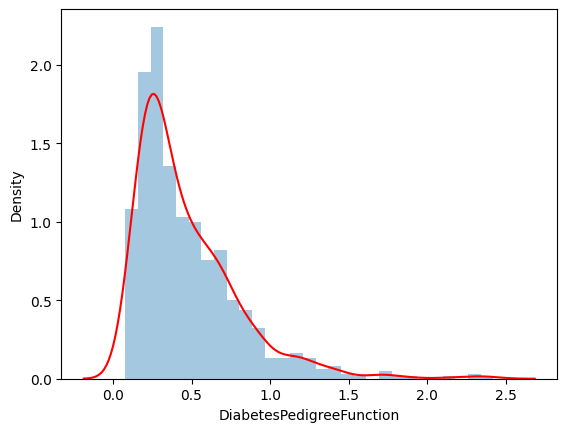

In [17]:
sea.distplot(dataset['DiabetesPedigreeFunction'],kde=True,kde_kws={'color':'red'})

<Axes: xlabel='Outcome', ylabel='Age'>

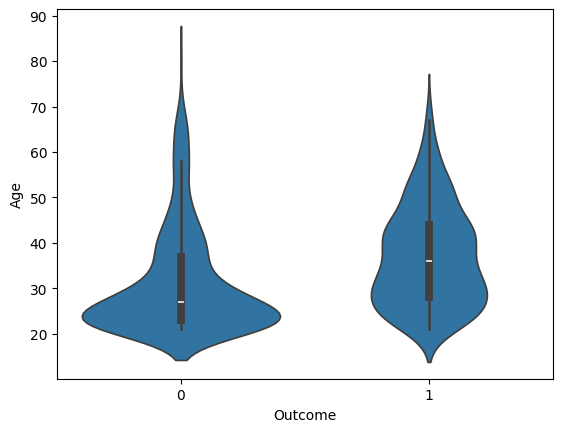

In [18]:
sea.violinplot(x='Outcome',y='Age',data=dataset)

In [19]:
# Select K best

from sklearn.feature_selection import SelectKBest
def selectkbest(inp,out,n):
        test = SelectKBest(score_func=chi2, k=n)
        fit1= test.fit(inp,out)
        selectk_features = fit1.transform(inp)
        return selectk_features

In [20]:
def logistic(X_train,y_train,X_test):
        # Fitting K-NN to the Training set
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [21]:
def cm_prediction(classifier,X_test):
     y_pred = classifier.predict(X_test)
        
        # Making the Confusion Matrix
     from sklearn.metrics import confusion_matrix
     cm = confusion_matrix(y_test, y_pred)
        
     from sklearn.metrics import accuracy_score 
     from sklearn.metrics import classification_report 
        #from sklearn.metrics import confusion_matrix
        #cm = confusion_matrix(y_test, y_pred)
        
     Accuracy=accuracy_score(y_test, y_pred )
        
     report=classification_report(y_test, y_pred)
     return  classifier,Accuracy,report,X_test,y_test,cm

In [22]:
def svm_linear(X_train,y_train,X_test):
                
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'linear', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm


In [23]:
def svm_NL(X_train,y_train,X_test):
                
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'rbf', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [24]:
def Navie(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB()
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm         

In [25]:
def knn(X_train,y_train,X_test):
           
        # Fitting K-NN to the Training set
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [26]:
def Decision(X_train,y_train,X_test):
        
        # Fitting K-NN to the Training set
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm      

In [27]:
def random(X_train,y_train,X_test):
        
        # Fitting K-NN to the Training set
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [28]:
def selectk_Classification(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf): 
    
    dataframe=pd.DataFrame(index=['ChiSquare'],columns=['Logistic','SVMl','SVMnl','KNN','Navie','Decision','Random'])
    for number,idex in enumerate(dataframe.index):      
        dataframe['Logistic'][idex]=acclog[number]       
        dataframe['SVMl'][idex]=accsvml[number]
        dataframe['SVMnl'][idex]=accsvmnl[number]
        dataframe['KNN'][idex]=accknn[number]
        dataframe['Navie'][idex]=accnav[number]
        dataframe['Decision'][idex]=accdes[number]
        dataframe['Random'][idex]=accrf[number]
    return dataframe

In [29]:
kbest=selectkbest(input,output,5)       

acclog=[]
accsvml=[]
accsvmnl=[]
accknn=[]
accnav=[]
accdes=[]
accrf=[]

In [30]:
kbest

array([[  6. , 148. ,   0. ,  33.6,  50. ],
       [  1. ,  85. ,   0. ,  26.6,  31. ],
       [  8. , 183. ,   0. ,  23.3,  32. ],
       ...,
       [  5. , 121. , 112. ,  26.2,  30. ],
       [  1. , 126. ,   0. ,  30.1,  47. ],
       [  1. ,  93. ,   0. ,  30.4,  23. ]])

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
def split_scalar(input,output):
        X_train, X_test, y_train, y_test = train_test_split(input, output, test_size = 0.25, random_state = 0)
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)    
        return X_train, X_test, y_train, y_test

In [32]:
X_train, X_test, y_train, y_test=split_scalar(kbest,output)   
    
        
classifier,Accuracy,report,X_test,y_test,cm=logistic(X_train,y_train,X_test)
acclog.append(Accuracy)

classifier,Accuracy,report,X_test,y_test,cm=svm_linear(X_train,y_train,X_test)  
accsvml.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=svm_NL(X_train,y_train,X_test)  
accsvmnl.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=knn(X_train,y_train,X_test)  
accknn.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=Navie(X_train,y_train,X_test)  
accnav.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=Decision(X_train,y_train,X_test)  
accdes.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=random(X_train,y_train,X_test)  
accrf.append(Accuracy)
    
result=selectk_Classification(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf)

In [33]:
result

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
ChiSquare,0.786458,0.78125,0.770833,0.796875,0.765625,0.760417,0.765625


In [34]:
# Save the best model

import pickle
filename = "Capstone_project.sav"

In [35]:
pickle.dump(classifier,open(filename,'wb'))

In [36]:
# load the saved model for test

Load_model=pickle.load(open("Capstone_project.sav",'rb'))
Result=Load_model.predict([[6,100,50,40,30]])
print("Outcome: ",Result[0])

Outcome:  1
